In [ ]:
import torch
import torch.nn as nn

# MSE Loss (L2 Loss)

## Generating random 3 by 2 tensor

In [ ]:
input = torch.randn(3, 2)
target = torch.randn(3, 2)

In [ ]:
input

tensor([[ 0.3188, -0.5493],
        [ 1.3590,  0.7888],
        [ 0.4838,  0.4685]])

## Creating an instance of loss function

In [ ]:
mse_loss = nn.MSELoss()

## Calculating loss

In [ ]:
output = mse_loss(input, target)

In [ ]:
output

tensor(0.1386)

In [ ]:
x = [9.37, 8.53, 5.29, 3.17, 7.00, 6.21, 6.96, 7.09]
y = [7.23, 4.75, 6.53, 9.37, 8.33, 1.87, 9.27, 9.47]

# x and y both are lists, lets convert them to tensors

x_tensor = torch.tensor(x)
y_tensor = torch.tensor(y)


In [ ]:
output = mse_loss(x_tensor, y_tensor)
output

tensor(11.3063)

# MAE loss (L1 loss)

In [ ]:
mae_loss = nn.L1Loss()

In [ ]:
output = mae_loss(x_tensor, y_tensor)
output

tensor(2.9650)

# L1 vs L2 loss?
## When to use which one?

Well think about it. L1 is just the difference of 2 value and L2 is square. Which means if your dataset has outliars, L2 loss will shoot up a lot because of the square factor, so whenever you are deciding on which loss to use in your NN, thats the concept you need to keep in mind.

In [ ]:
x = [900.37, 8.53, 5.29, 3.17, 7.00, 6.21, 6.96, 7.09]
y = [7700.23, 4.75, 6.53, 9.37, 8.33, 1.87, 9.27, 9.47]

# x and y both are lists, lets convert them to tensors

x_tensor = torch.tensor(x)
y_tensor = torch.tensor(y)

In [ ]:
# L1 vs L2 loss
l1 = mae_loss(x_tensor, y_tensor)
l2 = mse_loss(x_tensor, y_tensor)
print("L1 loss = ", l1, "L2 loss = ", l2)

L1 loss =  tensor(852.6800) L2 loss =  tensor(5779772.5000)


#Binary cross entrophy loss

- Usually used when the output labels have values 0 or 1
- It can also be used when the output labels have values **between** 0 and 1
- It is also widely used when we have only two classes (0 or 1) (example: yes or no)

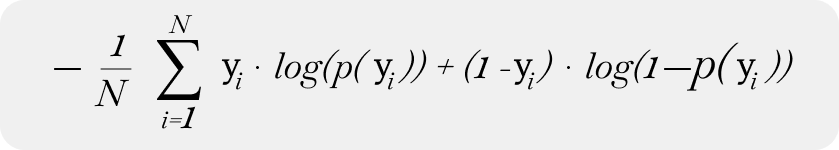

- Yi - Actual class label (0 or 1)
- p - predicted probability for the class
- n - number of samples

In [ ]:
def crossEntropy(yhat, y):
  if yhat == 1:
    # for label value where y = 1 and  (1-y) will become zero
    return -log(y)
  else:
    # for label value where y = 0 and  (1-y) will become one
    return -log(1-y)

## Log Graph

In [ ]:
!pip install bokeh

In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool
import numpy as np

output_notebook()   # Allows for interactive figures in the notebook

# Generate x values
x = np.linspace(0.01, 2, 400)

# Calculate y values
y = -np.log10(x)

TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)")
]

# create a new plot with the tooltip
p = figure(width=400, height=400, tooltips=TOOLTIPS,
           title="-log10(x)", x_axis_label='x', y_axis_label='-log10(x)')

# plot
p.line(x, y)

show(p)


In [ ]:
# Prediction probabilities and targets
targets = torch.tensor([1, 0, 1, 1, 0], dtype=torch.float)
predicted_probs = torch.tensor([0.9, 0.1, 0.8, 0.7, 0.2])

# Binary Cross Entropy Loss
bce_loss = nn.BCELoss()
loss = bce_loss(predicted_probs, targets)

print(loss)


tensor(0.2027)


#Cross entrophy loss

- Usually used when the output labels have more than once class
- E.g. If you want to classify if a given image is a cat, dog, elephant, zebra
- Now you have 4 classes and the output would look something like this.

  ```[0.9, 0.04, 0.04, 0.02]```
which means model is predicting that the image is a
  - **Cat** with 90% certainity,
  - 4% Dog,
  - 4% its an Elephant, and
  - 2% certain that is a Zebra

In [ ]:
# Example of target with class indices
ce_loss = nn.CrossEntropyLoss()
input = torch.tensor([[0.5607, -0.7322, 1.4033, -0.3852]])

# sm = nn.Softmax()
# input = sm(input)
target = torch.empty(1, dtype=torch.long).random_(4)

input, target

(tensor([[ 0.5607, -0.7322,  1.4033, -0.3852]]), tensor([2]))

In [ ]:
output = ce_loss(input, target)
output

tensor(0.5400)

In [ ]:

sm = nn.Softmax()
input = sm(input)
input

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.2509, 0.0689, 0.5828, 0.0974]])

###Why Softmax?
Now you might say, I can see that 1.4 is maximum, why apply softmax on it?
- Softmax is only applied during training not during testing.
- Softmax is applied during training because Cross Entrophy takes **LOG** of the output and inorder to have an efficient logrithm, it is important to have a proper probability distribution that sums up to 1.
